In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def opening_csv(filepath):
    df = pd.read_csv(filepath)
    df_copy = df.copy()
    return df_copy

comp_df = opening_csv('../data/computer_prices_all.csv')
print(comp_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_tier          

In [4]:
def df_size(df):
    return f' rows, columns: {df.shape}, Elements: {df.size}'
print(df_size(comp_df))

 rows, columns: (100000, 33), Elements: 3300000


In [4]:
# Good Practice
def df_cleaning(df):
    return df.drop_duplicates(inplace = True) 
print(df_cleaning(comp_df))

None


In [ ]:
comp_df.T


# Describe the available fields.
How many categorical fields? What do they represent?

33 columns (Review)
Qualitative (13) - 
device_type, brand, model, os, form_factor,_cpU_brand, cpu_model, gpu_brand, gpu_model, gpu_tier(subjective/brenchmark), storage_type, display_type, wifi, bluetooth, warrantly_month



Quantitative (20)- release_year, cpu_cores, cpu_threads, cpu_base_ghz, cpu_boost_ghz, vram_gb, ram_gb, storage_gb, storage_drive_count, deisplay_size_in, resolution, 
refresh_hz, battery_wh, charger_watts, psu_wats, weights_kg, price


If the data in this dataset has already been summed, averaged, or aggregated in some other way, much of the types of data work you would like to demonstrate has already been done.
Is there missing data or data that seems to be wrong somehow (e.g. age = -99)? Has the data already been summarized, or are the observations raw and unprocessed?

- Initial impression: Seem like a Data Scraping with 100k rows of data. The goal was to predict pricing based the columns(features). 
Later on, noticed that there are dummy datas to oversaturated Leenovo and Apple Desktops. 
When, used samples - observed some model from other brands were merged to create a row.

Direction 1 - Investigating

In [6]:
# print(comp_copy['form_factor'].value_counts())
device_form_factor = round(comp_df.groupby(['device_type', 'form_factor'])['price'].mean(),2)
print(device_form_factor)

device_type  form_factor
Desktop      ATX            1793.33
             Full-Tower     1841.25
             Micro-ATX      1803.55
             Mini-ITX       1809.84
             SFF            1895.51
Laptop       2-in-1         1918.51
             Gaming         2068.66
             Mainstream     1917.41
             Ultrabook      2046.94
             Workstation    2079.96
Name: price, dtype: float64


In [5]:
# # Aggregate data for stacked bar
brand_to_quantity = comp_df.groupby(['brand', 'device_type'])['form_factor'].value_counts()

# # Lenovo subset and reshape for stacked bar
# lenovo_data = brand_to_quantity.loc['Lenovo'].unstack(fill_value=0)

# # Plot
# ax = lenovo_data.plot( kind='bar', stacked=True, figsize=(8,5), colormap='rocket')

# ax.set_xlabel('Device Type', fontsize=12, fontfamily='arial')
# ax.set_ylabel('Quantity', fontsize=12, fontfamily='arial')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# ax.set_title('Lenovo: Form Factors by Device Type', fontsize=16, fontfamily='arial')
# plt.show()

In [8]:

# Pointed out that Lenovo dominates in Laptop
# Interesting Obersvation - Apple has Desktops?

brand_device_count = comp_df[['brand', 'device_type']].value_counts()
print(brand_device_count)
# brand_device_count.plot.barh()

brand     device_type
Lenovo    Laptop         9507
Dell      Laptop         8371
HP        Laptop         8362
Apple     Laptop         7130
Lenovo    Desktop        6485
ASUS      Laptop         6093
Acer      Laptop         6044
HP        Desktop        5752
Dell      Desktop        5634
Samsung   Laptop         4948
Apple     Desktop        4785
MSI       Laptop         4673
ASUS      Desktop        4066
Acer      Desktop        3881
MSI       Desktop        3218
Samsung   Desktop        3118
Gigabyte  Laptop         2875
          Desktop        2025
Razer     Laptop         1841
          Desktop        1192
Name: count, dtype: int64


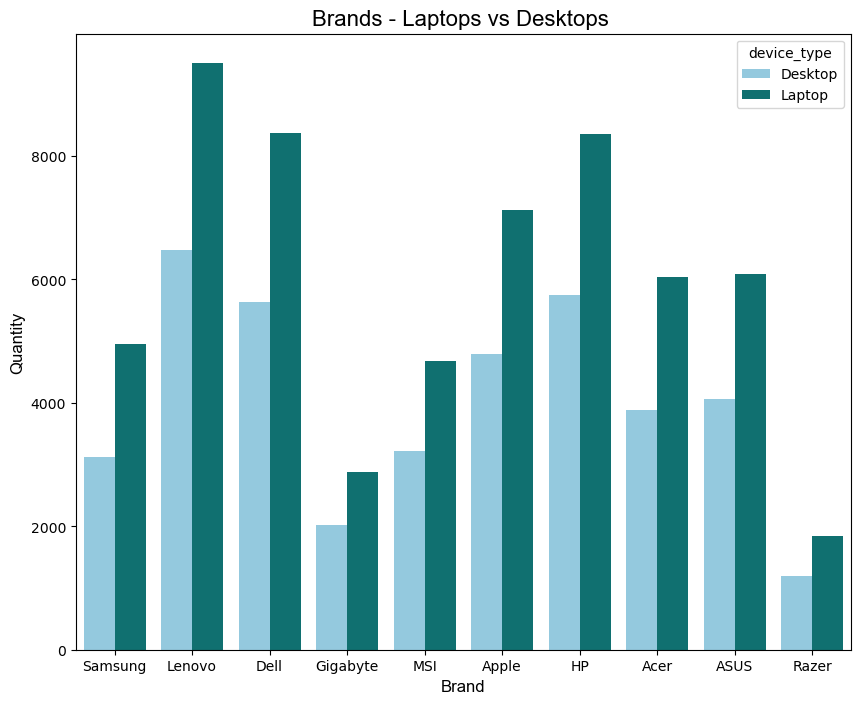

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=comp_df, x='brand', hue='device_type', palette=['skyblue', 'teal'])
ax.set_xlabel('Brand', fontsize =12, fontfamily='arial')
ax.set_ylabel('Quantity', fontsize =12, fontfamily='arial')
ax.set_title('Brands - Laptops vs Desktops ', fontsize =16, fontfamily='arial')

plt.show()

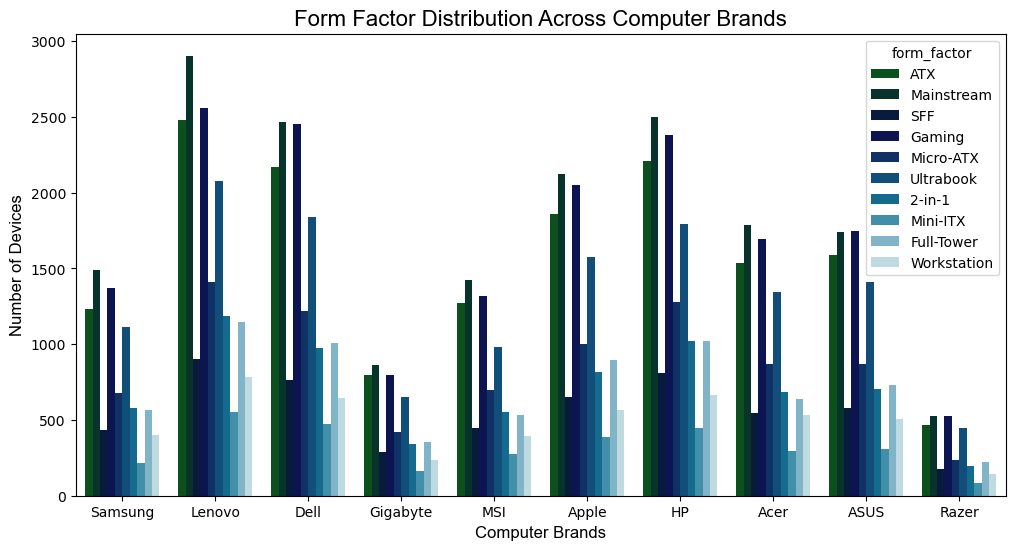

In [10]:
font_labels = {'fontsize': 12, 'fontfamily': 'arial'}
title_labels = {'fontsize': 16, 'fontfamily': 'arial'}

plt.figure(figsize=(12,6))
ax = sns.countplot(data=comp_df, x='brand', hue='form_factor', palette="ocean")
ax.set_xlabel('Computer Brands', font_labels)
ax.set_ylabel('Number of Devices', font_labels)
ax.set_title('Form Factor Distribution Across Computer Brands', title_labels )
plt.show()

In [32]:
brand_to_quantity = comp_df.groupby(['brand', 'device_type'])['form_factor'].value_counts()
print(brand_to_quantity.loc['Lenovo'])
print(brand_to_quantity.loc['Apple'])

# brand_to_quantity.loc['Lenovo'].unstack().plot(kind='bar', stacked=True, figsize=(8,5), title='Lenovo: Form Factors by Device Type')

device_type  form_factor
Desktop      ATX            2476
             Micro-ATX      1407
             Full-Tower     1146
             SFF             901
             Mini-ITX        555
Laptop       Mainstream     2903
             Gaming         2556
             Ultrabook      2078
             2-in-1         1184
             Workstation     786
Name: count, dtype: int64
device_type  form_factor
Desktop      ATX            1859
             Micro-ATX      1001
             Full-Tower      892
             SFF             648
             Mini-ITX        385
Laptop       Mainstream     2124
             Gaming         2050
             Ultrabook      1577
             2-in-1          813
             Workstation     566
Name: count, dtype: int64


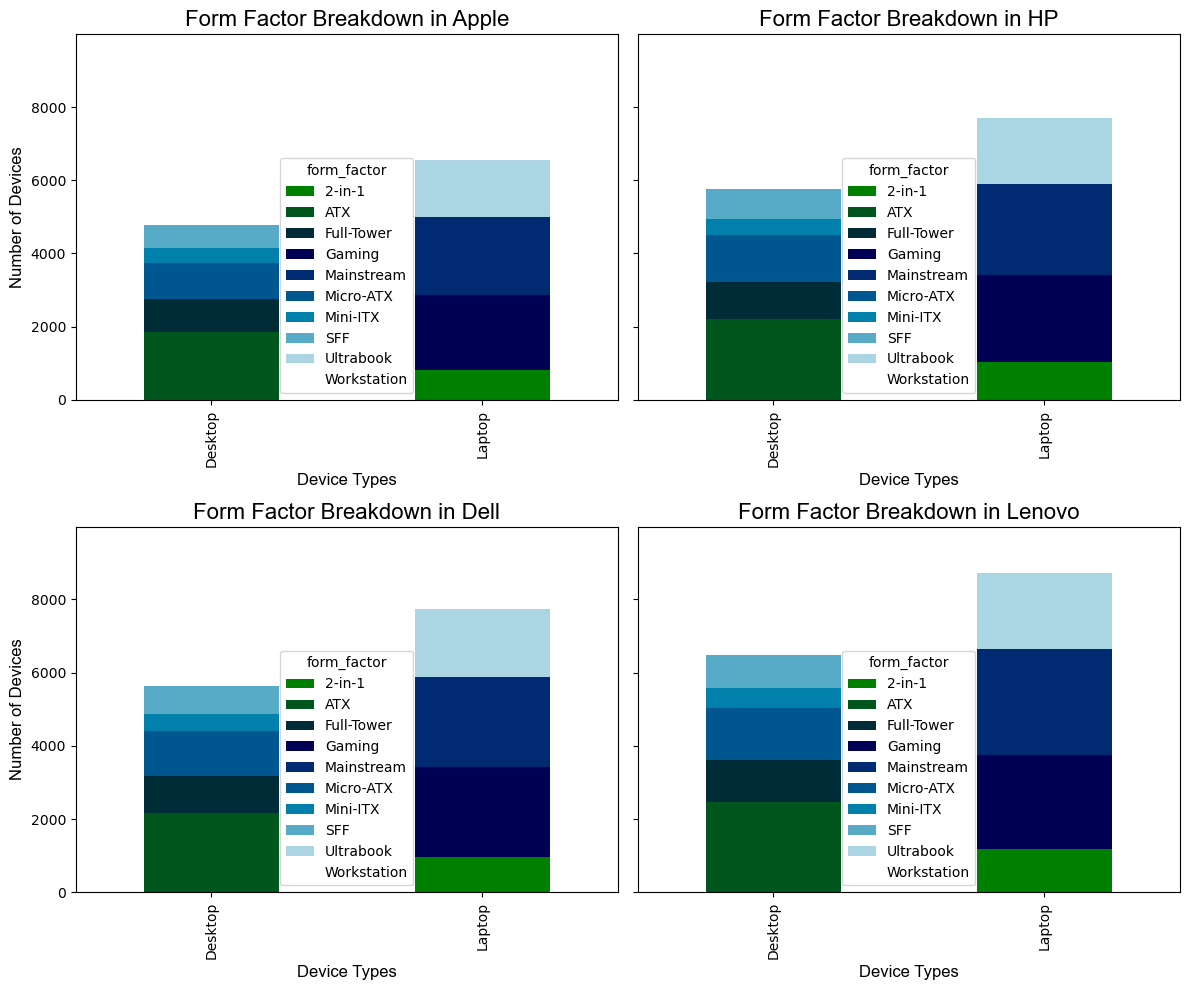

In [11]:
brands = ['Apple', 'HP', 'Dell', 'Lenovo']

# Create 2x2 subplots
fig, axes = plt.subplots(2,2, figsize=(12, 10), sharey=True)
axes = axes.flatten()  # flatten 2x2 array to 1D for iteration

for ax, brand in zip(axes, brands):
    brand_data = brand_to_quantity.loc[brand].unstack(fill_value=0)
    brand_data.plot(kind='bar', stacked=True, ax=ax, colormap='ocean')
    ax.set_title(f"Form Factor Breakdown in {brand}", title_labels)
    ax.set_xlabel('Device Types', font_labels)
    ax.set_ylabel('Number of Devices', font_labels)

plt.tight_layout()  # adjusts plot to prevent clipping
plt.show()

In [ ]:
lenovo_ranking = comp_df[comp_df['brand'] == 'Lenovo'].sort_values(by='price')
print(lenovo_ranking.min())

device_type                     Desktop
brand                            Lenovo
model                    Lenovo Air 004
release_year                       2018
os                             ChromeOS
form_factor                      2-in-1
cpu_brand                           AMD
cpu_model              AMD Ryzen 3 3103
cpu_tier                              1
cpu_cores                             4
cpu_threads                           6
cpu_base_ghz                        2.0
cpu_boost_ghz                       2.8
gpu_brand                           AMD
gpu_model              Apple Integrated
gpu_tier                              1
vram_gb                               0
ram_gb                                8
storage_type                        HDD
storage_gb                          256
storage_drive_count                   1
display_type                        IPS
display_size_in                    13.3
resolution                    1920x1080
refresh_hz                           60


In [17]:
brand_to_price = round(comp_df.groupby(['brand', 'device_type'])['price'].mean(), 2)
# print(brand_to_price.loc['Lenovo'])
# print(brand_to_price.loc['Apple'])
# print(brand_to_price.loc['Dell'])
# print(brand_to_price.loc['HP'])

In [15]:
tech_specs = ['brand', 'device_type', 'release_year', 'cpu_model', 'cpu_tier', 'cpu_cores', 'gpu_model', 'gpu_tier', 'ram_gb', 'price']
comp_df[comp_df['brand'] == 'Lenovo'][tech_specs].max()

brand                   Lenovo
device_type             Laptop
release_year              2025
cpu_model       Intel i9-14976
cpu_tier                     6
cpu_cores                   28
gpu_model           RX 7000 90
gpu_tier                     6
ram_gb                     144
price                 10984.99
dtype: object

In [ ]:
# filter_by_device = comp_df.groupby(['device_type', 'os'])[['cpu_brand']].value_counts()
# print(filter_by_device)

release_year
2018    1821.41
2019    1845.10
2020    1862.04
2021    1892.76
2022    1923.01
2023    1944.05
2024    1979.36
2025    1992.31
Name: price, dtype: float64


<Axes: xlabel='release_year'>

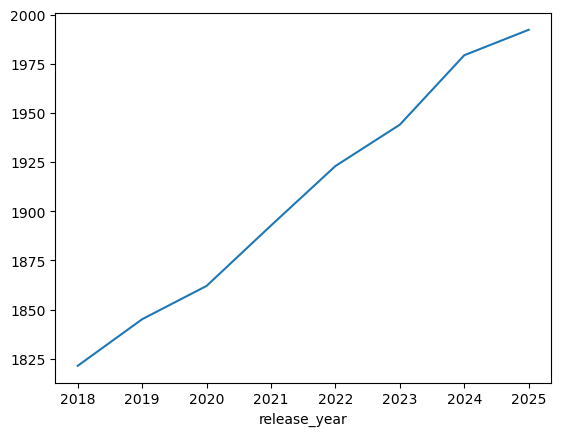

In [17]:
# Next Section - Price Increase over years (2018- Present)
# Years 
# Average -> Filtered by Device Type -> OS
price_over_yrs = round(comp_df.groupby(['release_year'])['price'].mean(),2)
print(price_over_yrs)
price_over_yrs.plot()

C:\Users\hungh\AppData\Local\Temp\ipykernel_30468\274605265.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.lineplot(data=comp_df, x='release_year', y= 'price', ci=95)


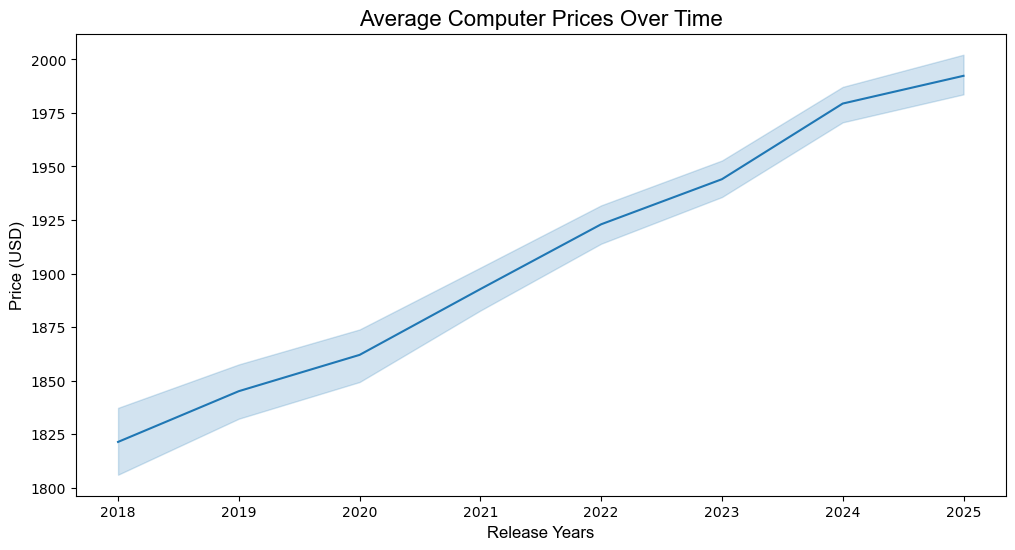

In [18]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=comp_df, x='release_year', y= 'price', ci=95)
# “The shaded area represents the 95% confidence interval, showing the range where we expect the true average price to lie, 
# giving insight into the reliability of the trend.”

ax.set_xlabel('Release Years', font_labels)
ax.set_ylabel('Price (USD)', font_labels)
ax.set_title('Average Computer Prices Over Time', title_labels )
plt.show()

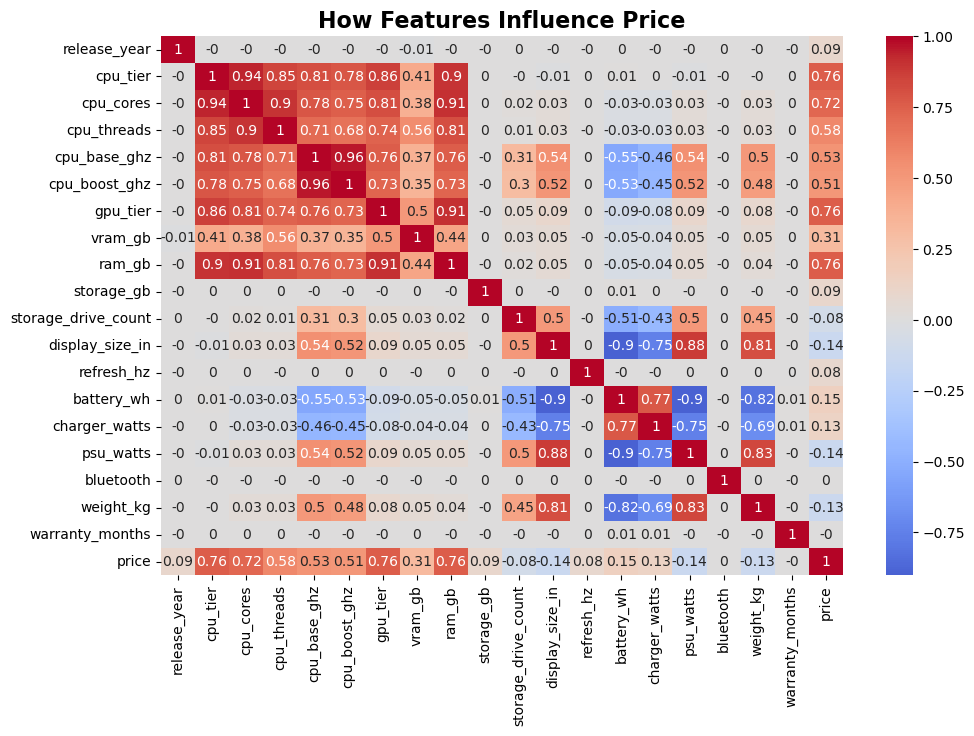

In [25]:
# Heatmap:
# Select only numeric columns for correlation
numeric_cols = comp_df.select_dtypes(include=['int64', 'float64']).columns
comp_df_numeric = comp_df[numeric_cols]
corr_matrix = comp_df_numeric.corr().round(2)

# Plot heatmap focusing on correlation with price
plt.figure(figsize=(11, 7)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('How Features Influence Price', fontsize=16, fontweight='bold')
plt.show()

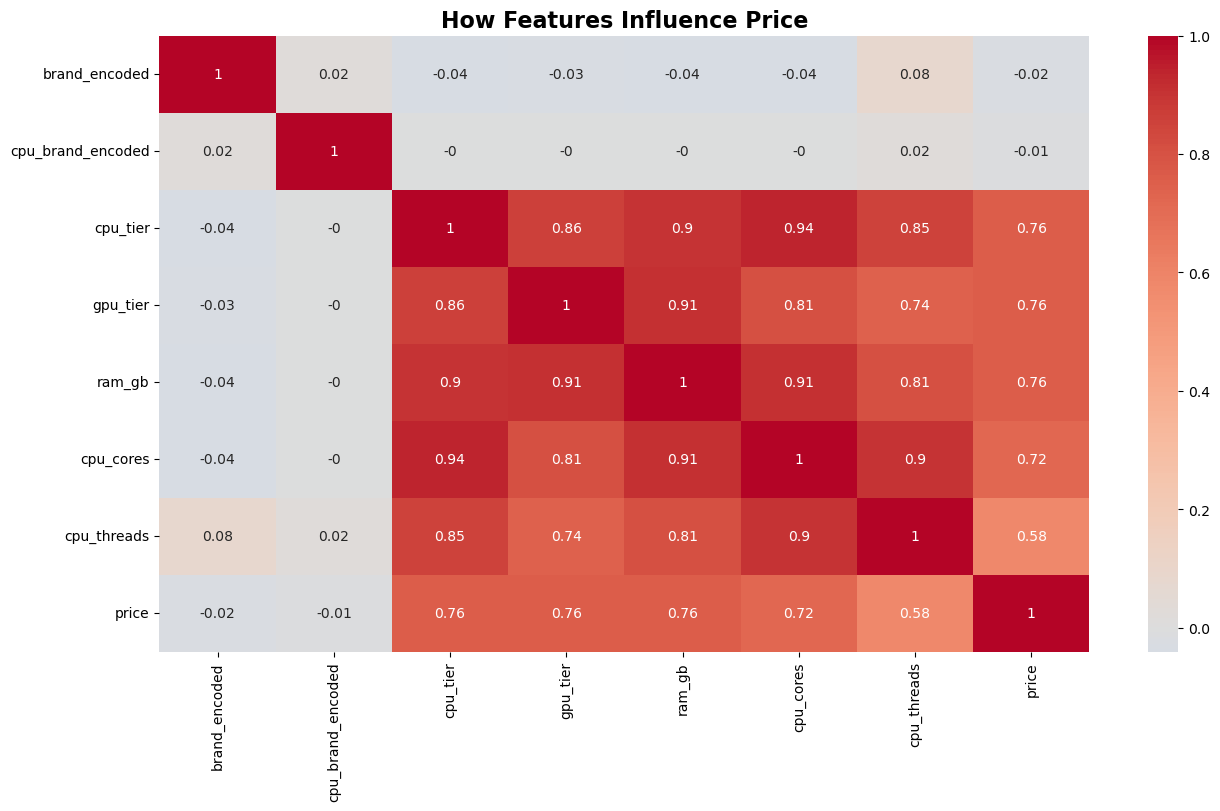

In [ ]:
# Heatmap:
# Select only numeric columns for correlation


top_features_cols = ['cpu_tier', 'gpu_tier', 'ram_gb', 'cpu_cores', 'cpu_threads' ,'price']
features_df_numeric = comp_df[top_features_cols]
features_matrix = features_df_numeric.corr().round(2)

# Plot heatmap focusing on correlation with price
plt.figure(figsize=(15, 8)) 
sns.heatmap(features_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('How Features Influence Price', fontsize=16, fontweight='bold')
plt.show()

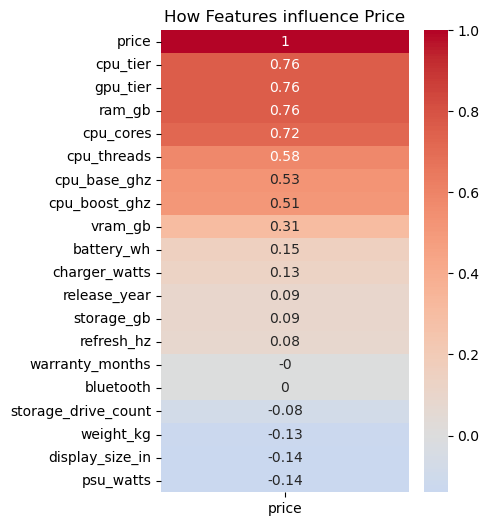

In [26]:
# Plot single-column heatmap showing correlation with price
plt.figure(figsize=(4, 6))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title("How Features influence Price")
plt.show()

Initial data exploration often sparks additional questions or potential insights that could be supported by continued exploration.

What types of questions does this dataset seem to support? Data Scraping to determine Pricing
- Don't have quanitity who is purchasing it to find popularity
- Probably finding the average(?) 
what specs/feature that lead the pricing 

Be especially on the lookout for avenues of inquiry that produce a tangible value (the ability to make better targeted or informed decisions, or some other potential benefit to stakeholders).


In [15]:
comp_df.describe().T
# Focus on price = cpu_tier, gpu_tier, ram_gb, cpu_cores

#           count       mean        std         min     25%-Q1 50% (med) 75%-Q3  max
# cpu_tier	100000.0	3.153490	1.373175	1.00	2.00	3.00	4.00	6.00
# gpu_tier	100000.0	2.991350	1.459643	1.00	2.00	3.00	4.00	6.00
# ram_gb	100000.0	39.706400	31.902684	8.00	16.00	32.00	64.00	144.00
# cpu_cores	100000.0	10.515740	5.044092	4.00	6.00	8.00	14.00	28.00
# cpu_threads100000.0	19.372700	9.718426	4.00	12.00	16.00	24.00	56.00

# pd.sample(1000) -> pairplot (4) - sample (1000

,count,mean,std,min,25%,50%,75%,max
release_year,100000.0,2022.320850,2.025761,2018.00,2021.00,2023.00,2024.00,2025.00
cpu_tier,100000.0,3.153490,1.373175,1.00,2.00,3.00,4.00,6.00
cpu_cores,100000.0,10.515740,5.044092,4.00,6.00,8.00,14.00,28.00
cpu_threads,100000.0,19.372700,9.718426,4.00,12.00,16.00,24.00,56.00
cpu_base_ghz,100000.0,2.591322,0.336435,2.00,2.40,2.60,2.80,3.40
cpu_boost_ghz,100000.0,3.531310,0.350024,2.80,3.30,3.50,3.80,4.50
gpu_tier,100000.0,2.991350,1.459643,1.00,2.00,3.00,4.00,6.00
vram_gb,100000.0,6.152180,3.964926,0.00,4.00,6.00,8.00,16.00
ram_gb,100000.0,39.706400,31.902684,8.00,16.00,32.00,64.00,144.00
storage_gb,100000.0,903.936000,774.243654,256.00,512.00,512.00,1024.00,4096.00


Ordinal Variables
    CPU Tier:
        Median: 3
        Range: 1 to 6
        Most values cluster around tiers 2–4
    GPU Tier:
        Similar distribution to CPU Tier
        Slightly wider spread due to higher standard deviation

💾 Numerical Variables
    RAM (GB):
        Median: 32 GB
        Wide spread from 8 GB to 144 GB
        Significant variability, with many systems above 64 GB
    CPU Cores:
        Median: 8 cores
        Range: 4 to 28 cores
        Noticeable skew toward higher core counts

In [ ]:
sns.pairplot(comp_df.sample(1000))
# pairplot - See Correlation
# Do Try to Remember this

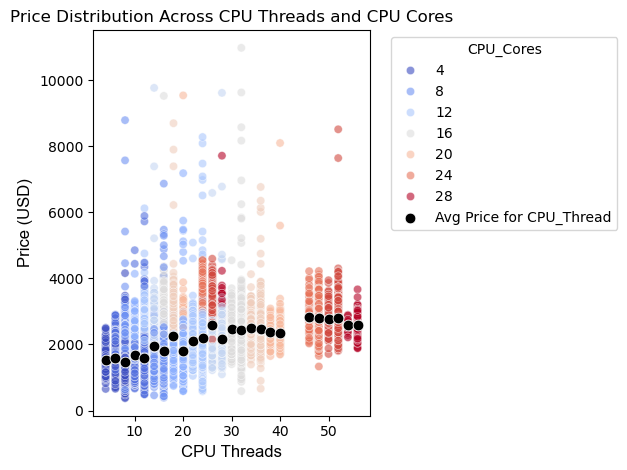

In [27]:
avg_cpu_threads = comp_df.groupby('cpu_threads')['price'].mean().reset_index()

plt.Figure(figsize=(10,6))
sns.scatterplot(data=comp_df, x ='cpu_threads', y='price', hue='cpu_cores', palette='coolwarm', alpha=0.6)
sns.scatterplot(data=avg_cpu_threads, x='cpu_threads', y='price', color='black', s=60, label='Avg Price for CPU_Thread')

plt.title('Price Distribution Across CPU Threads and CPU Cores')
plt.xlabel('CPU Threads', font_labels)
plt.ylabel('Price (USD)', font_labels)
plt.legend(title='CPU_Cores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

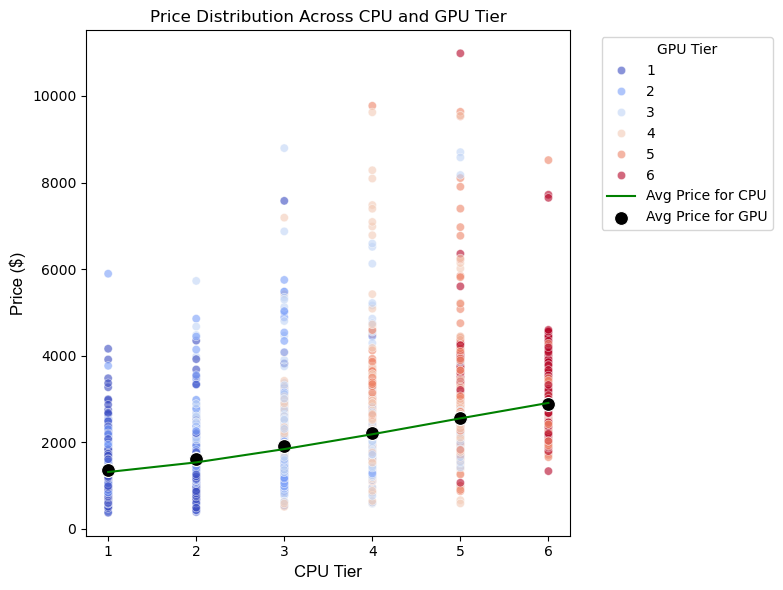

In [28]:
# Compute average price per CPU tier
avg_cpu = comp_df.groupby('cpu_tier')['price'].mean().reset_index()
avg_gpu = comp_df.groupby('gpu_tier')['price'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=comp_df, x='cpu_tier', y='price', hue='gpu_tier', palette='coolwarm',alpha=0.6)
sns.lineplot(data=avg_cpu, x='cpu_tier', y='price', color='green', label='Avg Price for CPU')
sns.scatterplot(data=avg_gpu, x='gpu_tier', y='price', color='black', s=100, label='Avg Price for GPU')

plt.title('Price Distribution Across CPU and GPU Tier')
plt.xlabel('CPU Tier', font_labels)
plt.ylabel('Price ($)', font_labels)
plt.legend(title='GPU Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

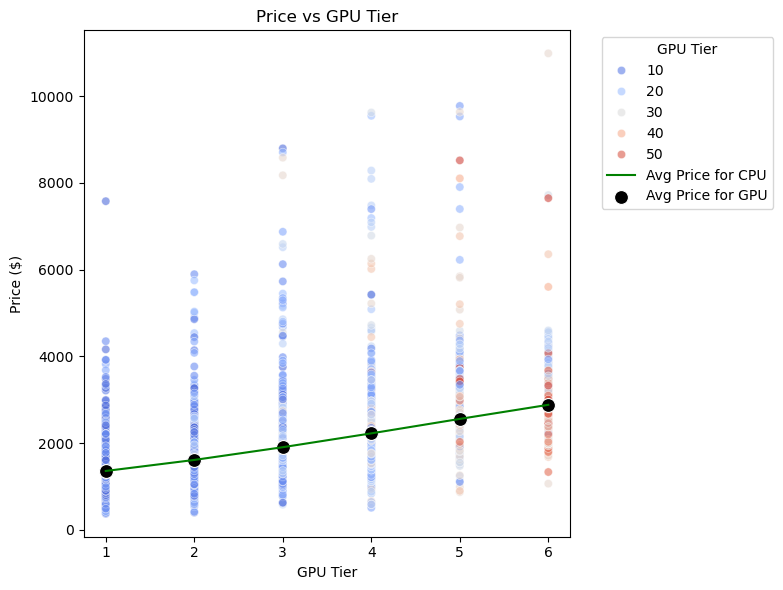

In [29]:
# Compute average price per CPU tier
avg_cpu = comp_df.groupby('cpu_tier')['price'].mean().reset_index()
avg_gpu = comp_df.groupby('gpu_tier')['price'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=comp_df, x='gpu_tier', y='price', hue='cpu_threads', palette='coolwarm',alpha=0.6)
sns.lineplot(data=avg_gpu, x='gpu_tier', y='price', color='green', label='Avg Price for CPU')
sns.scatterplot(data=avg_gpu, x='gpu_tier', y='price', color='black', s=100, label='Avg Price for GPU')

plt.title('Price vs GPU Tier')
plt.xlabel('GPU Tier')
plt.ylabel('Price ($)')
plt.legend(title='GPU Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

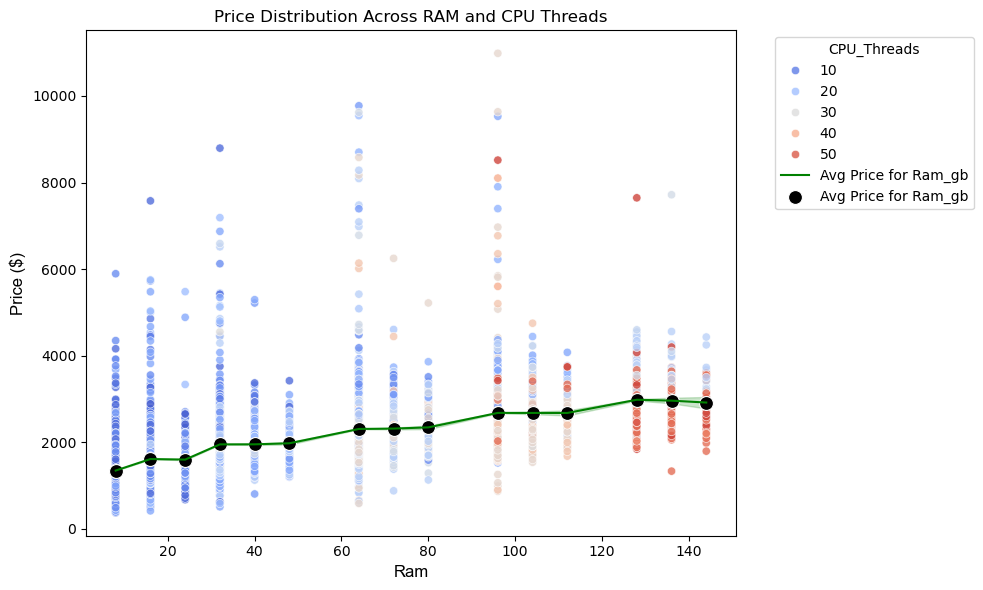

In [30]:
avg_ram = comp_df.groupby('ram_gb')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=comp_df, x='ram_gb', y='price', hue='cpu_threads', palette='coolwarm',alpha=0.8)
sns.lineplot(data=comp_df, x='ram_gb', y='price', color='green', label='Avg Price for Ram_gb')
sns.scatterplot(data=avg_ram, x='ram_gb', y='price', color='black', s=100, label='Avg Price for Ram_gb')

plt.title('Price Distribution Across RAM and CPU Threads')
plt.xlabel('Ram', font_labels)
plt.ylabel('Price ($)', font_labels)
plt.legend(title='CPU_Threads', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()